In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
dataset = pd.read_csv('C:\\Users\\Josham Kadiebwe\\Desktop\\python\\Datasets\\Dataset2\\Amazon_com.csv')

In [3]:
dataset.head(30)

,mrp,price,product_category,rating,review_count,Nylon,Rayon,Spandex,polyester,Cotton,Modal,Elastane,Classe
0,44.00,44.00,Bras,4.2,409,76,0,0,0,0,0,24.0,0
1,20.00,14.65,Panties,4.7,507,0,0,0,0,53,35,12.0,0
2,20.00,17.00,Panties,4.7,507,0,0,0,0,53,35,12.0,0
3,35.98,35.98,Panties,3.8,80,72,0,0,0,0,0,28.0,0
4,58.00,50.01,Bras,4.1,9,59,0,41,0,0,0,0.0,1
5,20.00,14.62,Panties,4.7,507,0,0,0,0,53,35,12.0,0
6,19.28,19.28,Bras,4.0,221,80,0,20,0,0,0,0.0,1
7,41.79,41.79,Bras,4.0,221,80,0,20,0,0,0,0.0,1
8,46.00,39.34,Bras,4.3,431,72,0,0,0,0,0,28.0,0
9,42.00,34.97,Bras,4.0,221,80,0,20,0,0,0,0.0,1


In [236]:
dataset.shape

(4808, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mrp               4808 non-null   float64
 1   price             4808 non-null   float64
 2   product_category  4808 non-null   object 
 3   rating            4808 non-null   float64
 4   review_count      4808 non-null   int64  
 5   Nylon             4808 non-null   int64  
 6   Rayon             4808 non-null   int64  
 7   Spandex           4808 non-null   int64  
 8   polyester         4808 non-null   int64  
 9   Cotton            4808 non-null   int64  
 10  Modal             4808 non-null   int64  
 11  Elastane          4808 non-null   float64
 12  Classe            4808 non-null   int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 488.4+ KB


In [6]:
dataset.isnull().sum()

mrp                 0
price               0
product_category    0
rating              0
review_count        0
Nylon               0
Rayon               0
Spandex             0
polyester           0
Cotton              0
Modal               0
Elastane            0
Classe              0
dtype: int64

In [7]:
dataset['Classe'].value_counts()

1    3442
0    1366
Name: Classe, dtype: int64

In [8]:
dataset.nunique()

mrp                  517
price               1508
product_category       2
rating                19
review_count         298
Nylon                 29
Rayon                  2
Spandex               24
polyester              7
Cotton                 5
Modal                  2
Elastane              20
Classe                 2
dtype: int64

# Analyse et visualisation des données

In [9]:
def data_graph (axis, width, height):
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    for p in axis.patches: 
        axis.annotate ("{0:.1f}".format(p.get_height()), (p.get_x()+width, p.get_height()+height))

Text(0.5, 1.0, 'Distribution des classes')

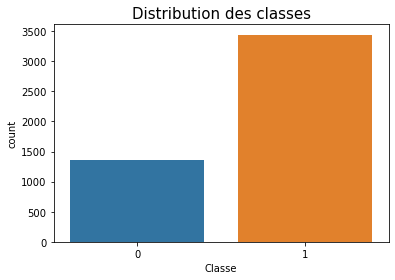

In [10]:
sns.countplot(x=dataset.Classe).set_title('Distribution des classes', size=15)

In [11]:
data0 = dataset.groupby('Classe')["rating","review_count"].sum().reset_index()
data0.head()

<ipython-input-11-28d352319dbb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data0 = dataset.groupby('Classe')["rating","review_count"].sum().reset_index()


,Classe,rating,review_count
0,0,5856.1,292593
1,1,14649.4,1890163


In [12]:
data1=data0[["Classe","review_count"]]
data1.head()

,Classe,review_count
0,0,292593
1,1,1890163


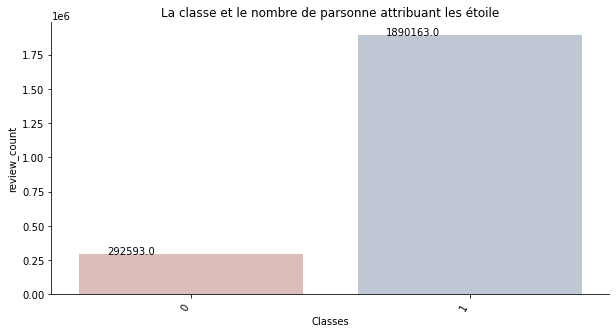

In [13]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Classe", y="review_count", data=data1, palette="vlag_r")
plt.title("La classe et le nombre de parsonne attribuant les étoile")
plt.xticks(rotation=60, ha='right')
plt.xlabel("Classes")
plt.ylabel("review_count")
data_graph(ax, 0.1, 10)
plt.show()

In [14]:
data2=data0[["Classe","rating"]]
data2.head()

,Classe,rating
0,0,5856.1
1,1,14649.4


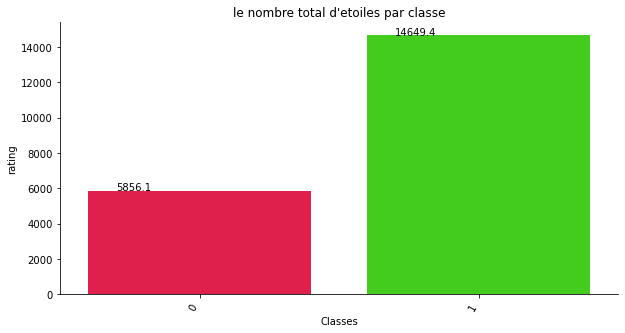

In [15]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Classe", y="rating", data=data2, palette='prism_r')
plt.title("le nombre total d'etoiles par classe")
plt.xticks(rotation=60, ha='right')
plt.xlabel("Classes")
plt.ylabel("rating")
data_graph(ax, 0.1, 10)
plt.show()

In [16]:
data3 = dataset.groupby('rating')["price","review_count"].sum().reset_index()
data3.head()

<ipython-input-16-71309b3e5b03>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data3 = dataset.groupby('rating')["price","review_count"].sum().reset_index()


,rating,price,review_count
0,3.0,49.00,2
1,3.1,264.57,78
2,3.2,34.99,14
3,3.5,144.67,33
4,3.6,102.71,36


In [17]:
data4=data3[["rating","review_count"]]
data4.head()

,rating,review_count
0,3.0,2
1,3.1,78
2,3.2,14
3,3.5,33
4,3.6,36


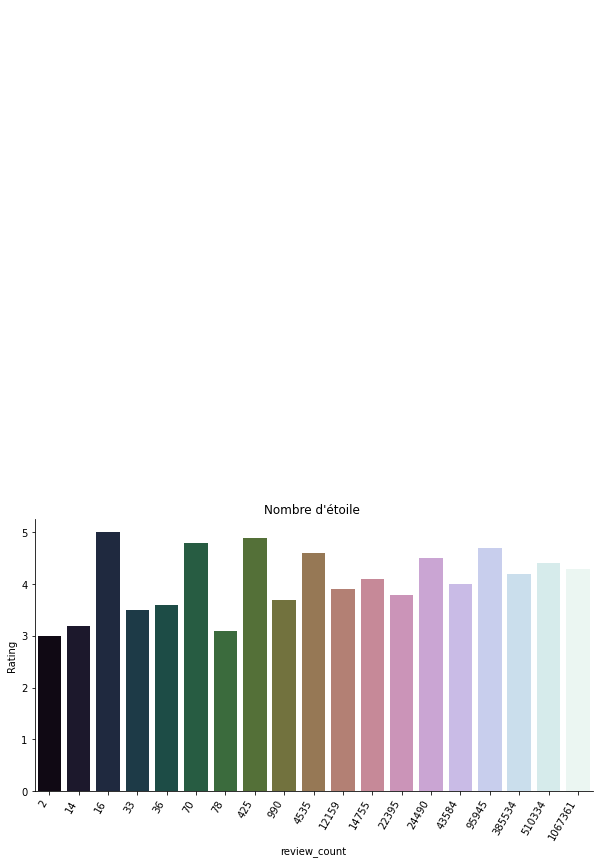

In [18]:
data5 = data4.sort_values("review_count", ascending=True)

plt.figure(figsize=(10,5))
ax = sns.barplot(x="review_count", y="rating", data=data5, palette="cubehelix")
plt.title("Nombre d'étoile ")
plt.xticks(rotation=60, ha='right')
plt.xlabel("review_count")
plt.ylabel("Rating")
data_graph(ax, 0.1, 10)
plt.show()

In [19]:
data6=data3[["rating","price"]]
data6.head()

,rating,price
0,3.0,49.00
1,3.1,264.57
2,3.2,34.99
3,3.5,144.67
4,3.6,102.71


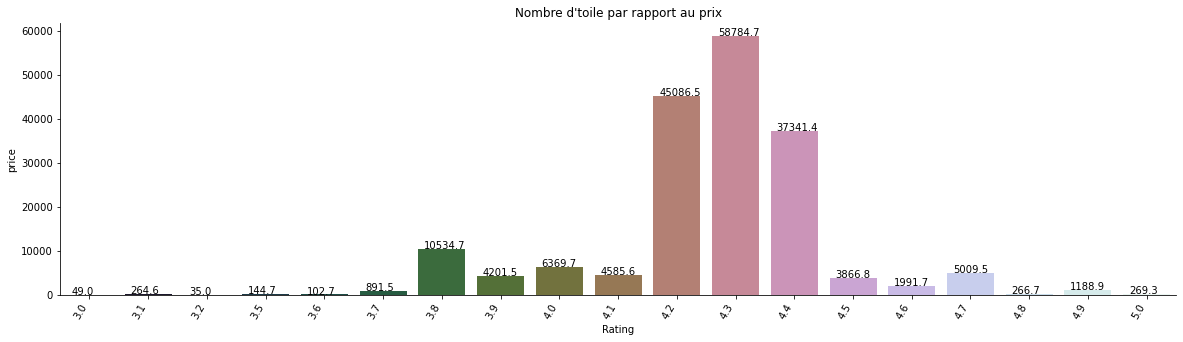

In [20]:
data7 = data6.sort_values("price", ascending=False)

plt.figure(figsize=(20,5))
ax = sns.barplot(x="rating", y="price", data=data7[ :20], palette="cubehelix")
plt.title("Nombre d'toile par rapport au prix")
plt.xticks(rotation=60, ha='right')
plt.xlabel("Rating")
plt.ylabel("price")
data_graph(ax, 0.1, 10)
plt.show()

<AxesSubplot:>

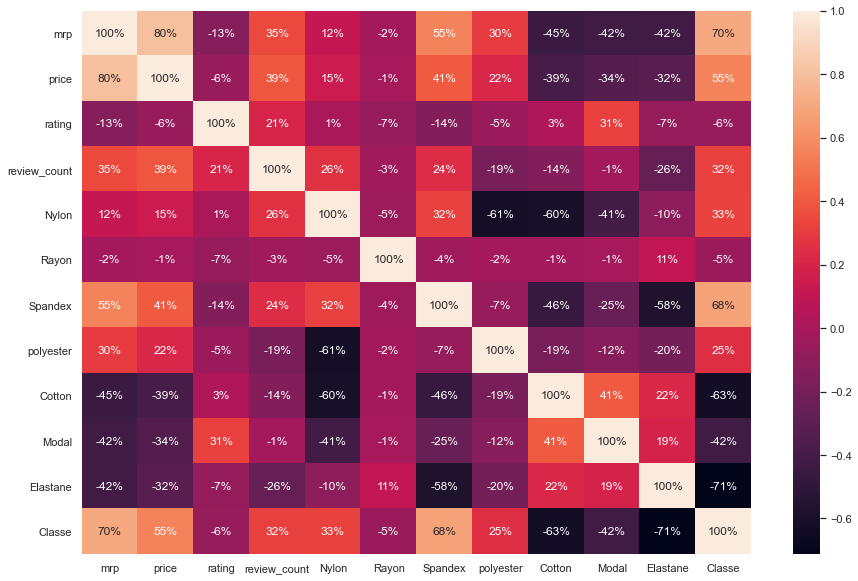

In [21]:
sns.set(rc={'figure.figsize': (15,10)})

corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.0%')

In [22]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    

C:\Users\JoshamKadiebwe\anaconda32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\JoshamKadiebwe\anaconda32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\JoshamKadiebwe\anaconda32\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


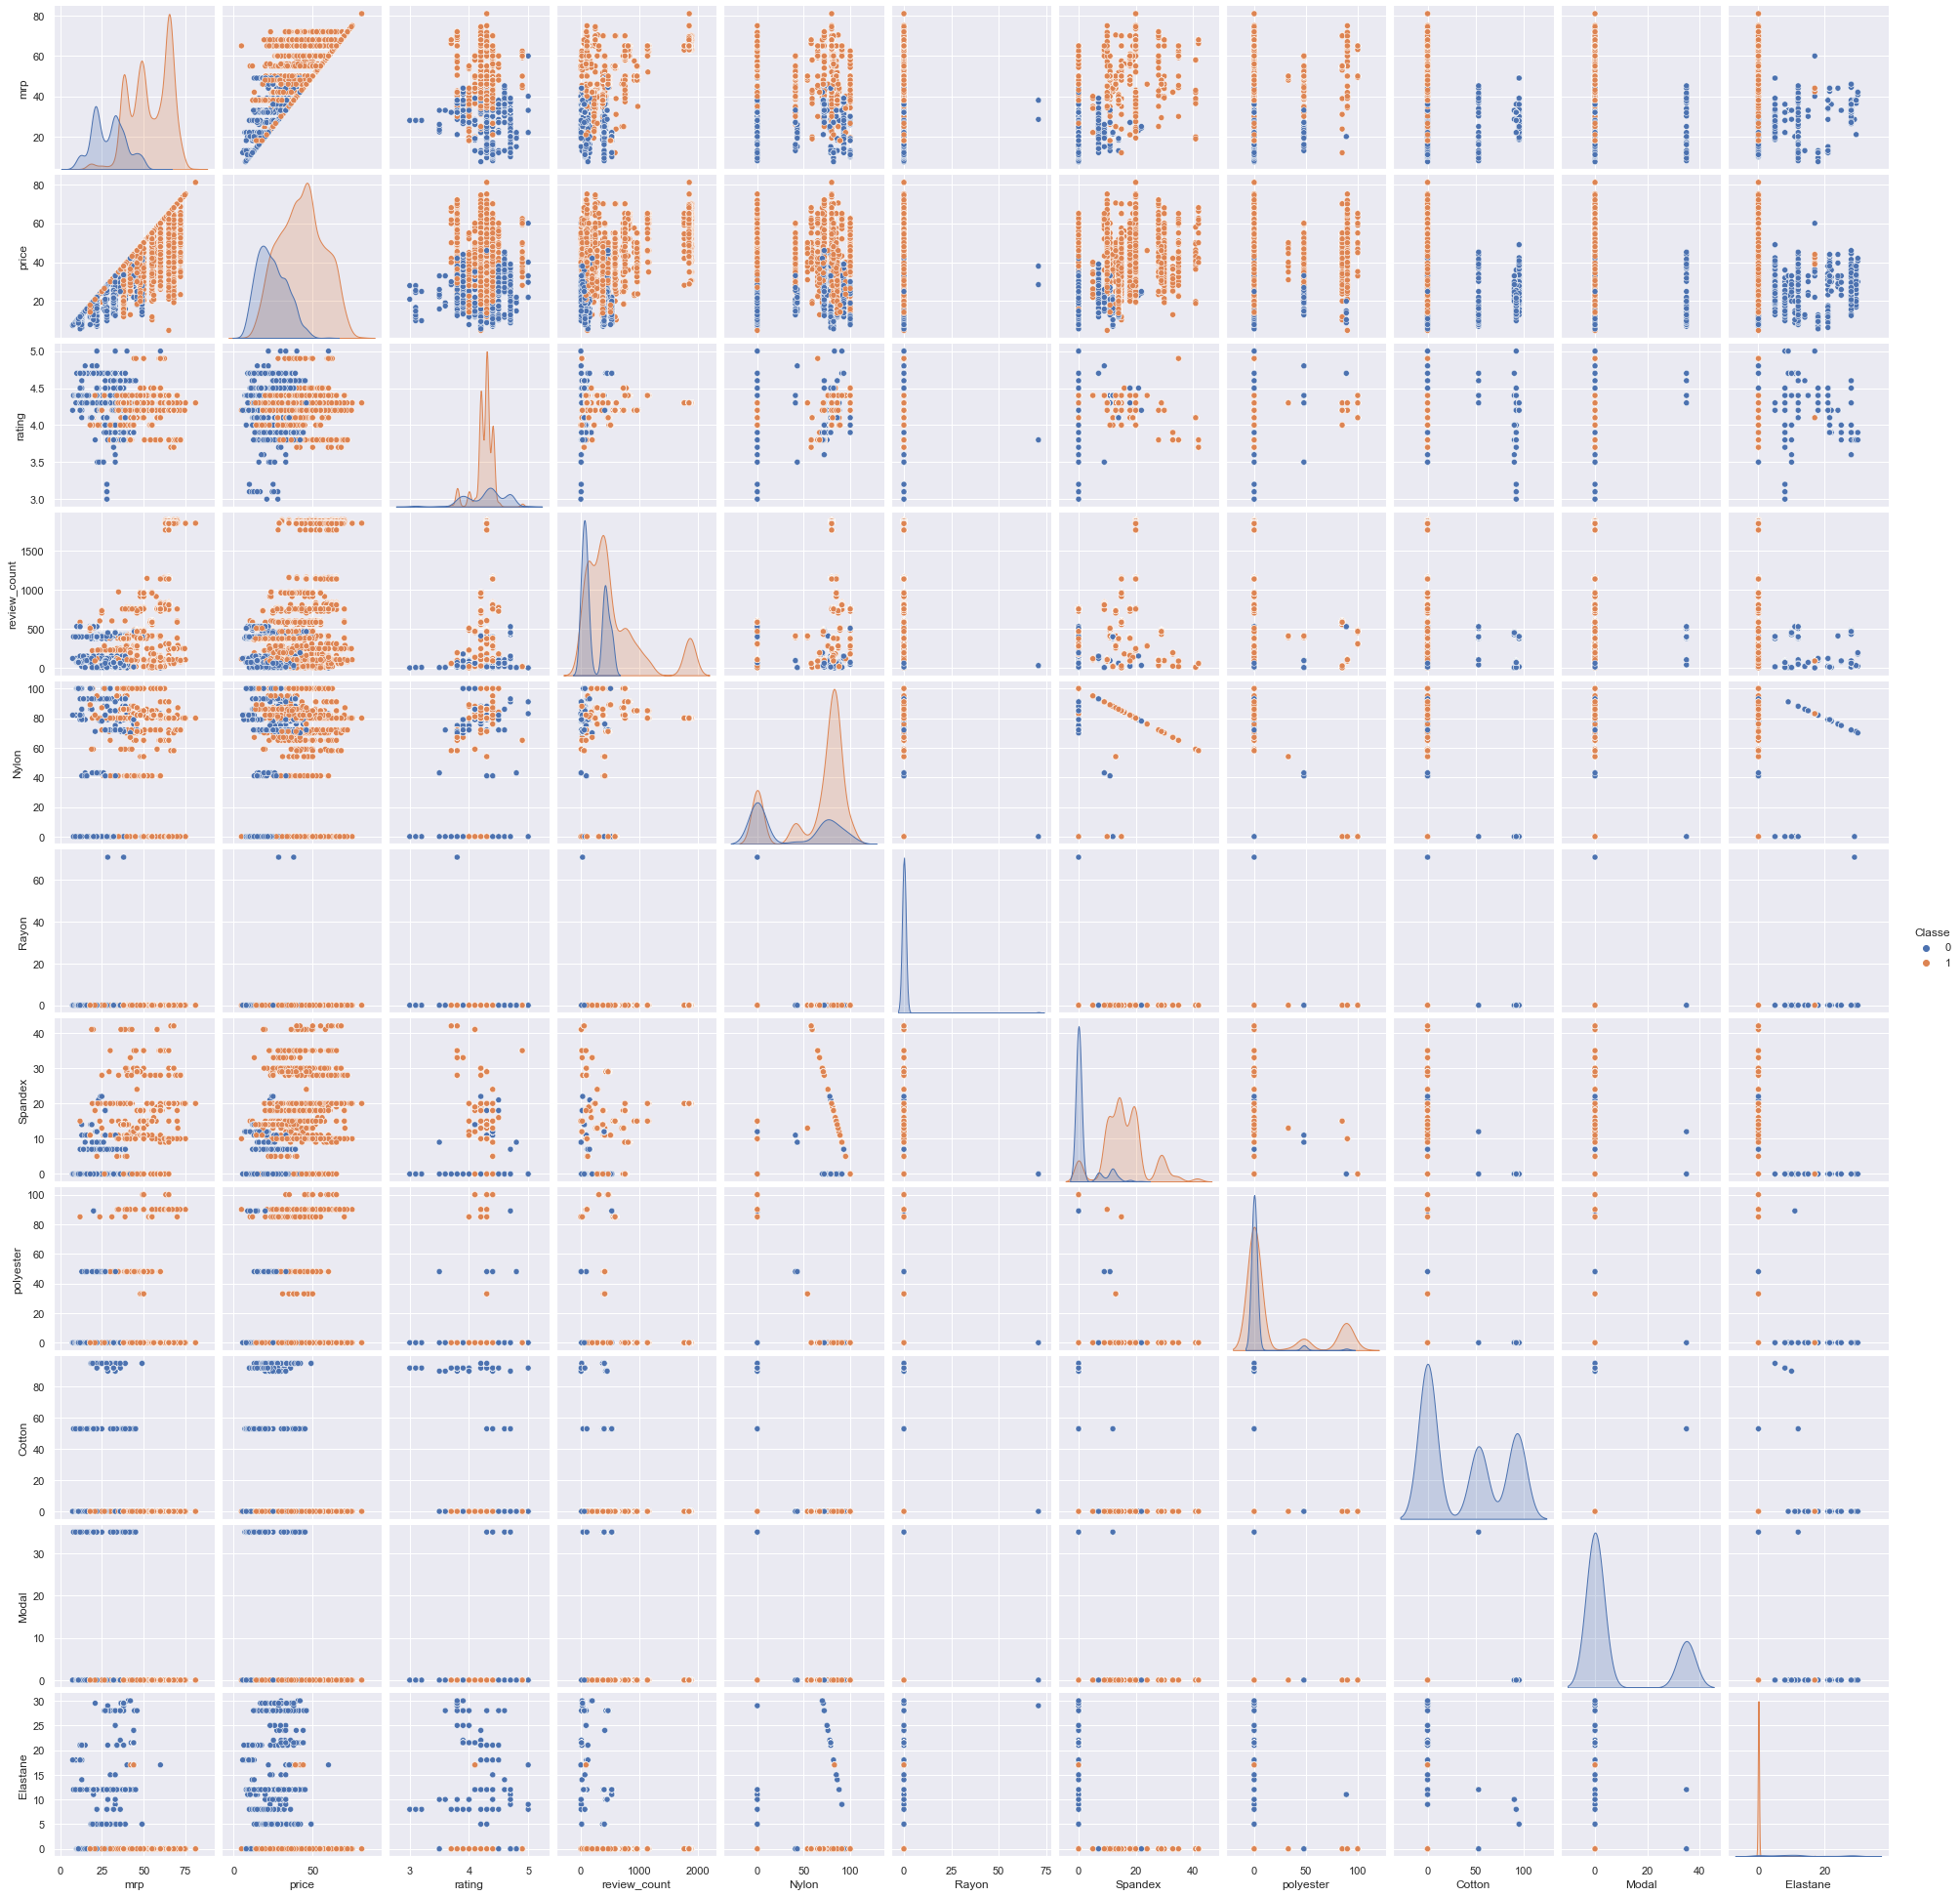

In [23]:
sns.pairplot(dataset, hue='Classe')

# Preprocessing

In [24]:
data=pd.get_dummies(dataset, columns=['product_category'], drop_first=True)
data

,mrp,price,rating,review_count,Nylon,Rayon,Spandex,polyester,Cotton,Modal,Elastane,Classe,product_category_Panties
0,44.00,44.00,4.2,409,76,0,0,0,0,0,24.0,0,0
1,20.00,14.65,4.7,507,0,0,0,0,53,35,12.0,0,1
2,20.00,17.00,4.7,507,0,0,0,0,53,35,12.0,0,1
3,35.98,35.98,3.8,80,72,0,0,0,0,0,28.0,0,1
4,58.00,50.01,4.1,9,59,0,41,0,0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,65.00,65.00,4.4,806,91,0,9,0,0,0,0.0,1,0
4804,65.00,54.50,4.3,1846,80,0,20,0,0,0,0.0,1,0
4805,60.00,60.00,4.4,753,100,0,0,0,0,0,0.0,1,0
4806,48.00,48.00,4.4,379,82,0,18,0,0,0,0.0,1,0


Split data to the matrice X and y

In [25]:
X = data.drop(["Classe"], axis=1)
y= data['Classe']

In [26]:
X.head()

,mrp,price,rating,review_count,Nylon,Rayon,Spandex,polyester,Cotton,Modal,Elastane,product_category_Panties
0,44.00,44.00,4.2,409,76,0,0,0,0,0,24.0,0
1,20.00,14.65,4.7,507,0,0,0,0,53,35,12.0,1
2,20.00,17.00,4.7,507,0,0,0,0,53,35,12.0,1
3,35.98,35.98,3.8,80,72,0,0,0,0,0,28.0,1
4,58.00,50.01,4.1,9,59,0,41,0,0,0,0.0,0


Division des données en traning et test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3365, 12), (1443, 12), (3365,), (1443,))

In [28]:
y_test.value_counts()

1    1037
0     406
Name: Classe, dtype: int64

Mettre les données en échelle

In [29]:
#features_scaling

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

X_train

array([[-1.23728283, -0.88717404,  1.08327224, ..., -0.26384125,
        -0.46176052,  1.97255884],
       [-1.26686071, -0.72535656,  0.62790546, ..., -0.26384125,
        -0.46176052, -0.50695573],
       [-0.54503435, -1.17296458,  0.17253868, ..., -0.26384125,
        -0.46176052, -0.50695573],
       ...,
       [ 1.154121  , -0.47480047,  0.17253868, ..., -0.26384125,
        -0.46176052, -0.50695573],
       [ 0.8394626 ,  0.78124246,  0.62790546, ..., -0.26384125,
        -0.46176052, -0.50695573],
       [-0.54503435, -0.54135443,  0.17253868, ..., -0.26384125,
        -0.46176052, -0.50695573]])

# Entrainement du modèle

1.RandomForest

In [30]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train.ravel())
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

1.0
Precision du modèle avec 100 arbres: 1.0000


In [31]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[ 406    0]
 [   0 1037]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1037

 Faux Negatives(FN) 0

 Faux Positives(FP) 0


<AxesSubplot:>

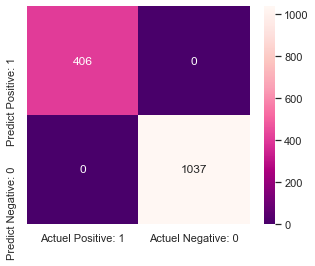

In [32]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='RdPu_r')

In [33]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

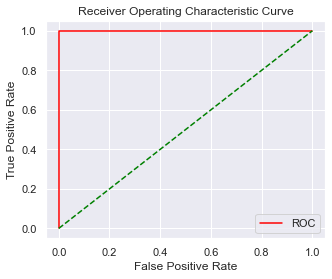

In [34]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [35]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00      1037

    accuracy                           1.00      1443
   macro avg       1.00      1.00      1.00      1443
weighted avg       1.00      1.00      1.00      1443



In [36]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

1.0
1.0
1.0


2.Algorthme SVM

In [37]:
svc= SVC()
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

0.9965349965349966
précision du modèle support vector machine : 0.9965


In [38]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[ 402    4]
 [   1 1036]]

 Vrais Positives(VP) 402

 vrais Negatives(VN) 1036

 Faux Negatives(FN) 4

 Faux Positives(FP) 1


<AxesSubplot:>

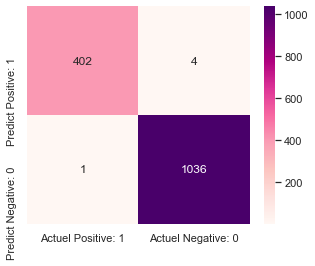

In [39]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='RdPu')

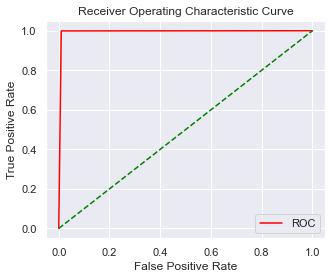

In [40]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [41]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       406
           1       1.00      1.00      1.00      1037

    accuracy                           1.00      1443
   macro avg       1.00      0.99      1.00      1443
weighted avg       1.00      1.00      1.00      1443



In [42]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.9965349965349966
0.9975926817525276
0.9945917315484701


3.Regression logistique

In [43]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

0.9993069993069993
Précision du modèle Regression logistique: 0.9993


In [44]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN) ', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[ 406    0]
 [   1 1036]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1036

 Faux Negatives(FN)  0

 Faux Positives(FP) 1


<AxesSubplot:>

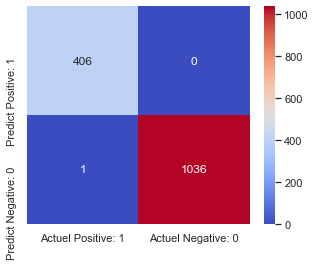

In [45]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='coolwarm')

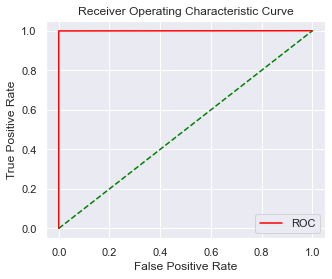

In [46]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [47]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       406
           1       1.00      1.00      1.00      1037

    accuracy                           1.00      1443
   macro avg       1.00      1.00      1.00      1443
weighted avg       1.00      1.00      1.00      1443



In [48]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9993069993069993
0.9995176073323685
0.9995178399228544


# Cross_validation

1.random_Forest

In [49]:
kfold = KFold(n_splits =10, shuffle = True, random_state=42)

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_scores= cross_val_score(rfc_100, X, y.ravel(), cv = kfold)
#pourcentage de Validation croisée avec randomforest
print('validation croisée stratifiée avec RandomForest:\n\n{}'.format(rfc_scores))

validation croisée stratifiée avec RandomForest:

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


2.SVM

In [50]:
kfold = KFold(n_splits =10, shuffle = True, random_state=42)

svc = SVC()
svc_scores= cross_val_score(svc, X, y.ravel(), cv = kfold)
#pourcentage de Validation croisée avec randomforest
print('validation croisée stratifiée avec support vector machine:\n\n{}'.format(svc_scores))

validation croisée stratifiée avec support vector machine:

[0.95218295 0.95841996 0.96465696 0.97089397 0.98336798 0.96673597
 0.97713098 0.98336798 0.96458333 0.96458333]


3.Regression Logistique

In [51]:
import warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [52]:
kfold = KFold(n_splits =10, shuffle = True, random_state=42)

log= LogisticRegression(solver='lbfgs',max_iter=100 )
log_scores= cross_val_score(log, X, y.ravel(), cv = kfold)
#pourcentage de Validation croisée avec RL
print('validation croisée stratifiée avec Regression logistique:\n\n{}'.format(log_scores))

validation croisée stratifiée avec Regression logistique:

[0.997921   0.99168399 0.98752599 0.997921   0.995842   1.
 0.995842   0.997921   0.99583333 0.99375   ]


# Equilibrage des données en appliquant deux techniques d'equilibrages(Suréchantillonage et souséchantillonage)

In [53]:
dataset['Classe'].value_counts(normalize=True)

1    0.71589
0    0.28411
Name: Classe, dtype: float64

Text(0.5, 1.0, 'Distribution de classes')

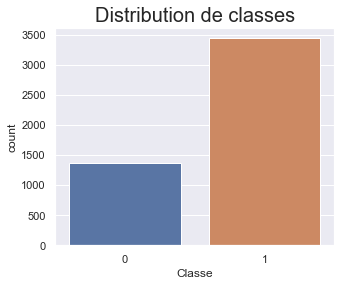

In [54]:
sns.countplot(x=dataset.Classe).set_title('Distribution de classes', size=20)

# 11. Suréchantillonnage avec RandomOversampling

In [55]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [56]:
#Spliter les données en données d'entrainementet de test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.3, random_state=0)
y_test.value_counts()

1    1037
0     406
Name: Classe, dtype: int64

In [57]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    2405
0    2405
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

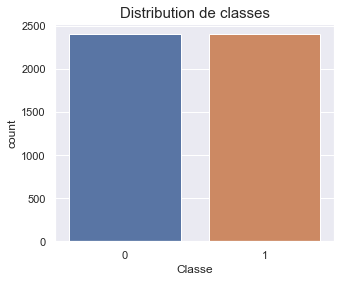

In [58]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=15)

In [59]:
#features_scaling

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train_res)
X_test = scale.fit_transform(X_test)

X_train

array([[-0.87680673, -0.63656768,  0.91948759, ..., -0.36042154,
        -0.66187436,  1.34948671],
       [-0.90542264, -0.47198512,  0.52186687, ..., -0.36042154,
        -0.66187436, -0.74102249],
       [-0.20707254, -0.9272417 ,  0.12424614, ..., -0.36042154,
        -0.66187436, -0.74102249],
       ...,
       [-0.20707254,  0.28920919,  0.91948759, ..., -0.36042154,
         1.59113935, -0.74102249],
       [ 0.28000686,  0.82012066,  0.12424614, ..., -0.36042154,
         2.34214392, -0.74102249],
       [-1.18123135, -1.06461505, -0.27337458, ..., -0.36042154,
         0.19641658,  1.34948671]])

# Entrainement du modèle RandomOversampling

1.RandomForest

In [60]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_res.ravel())
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

0.9958419958419958
Precision du modèle avec 100 arbres: 0.9958


In [61]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[ 406    0]
 [   6 1031]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1031

 Faux Negatives(FN) 0

 Faux Positives(FP) 6


<AxesSubplot:>

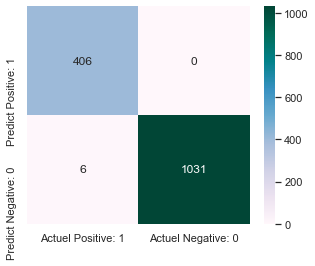

In [62]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='PuBuGn')

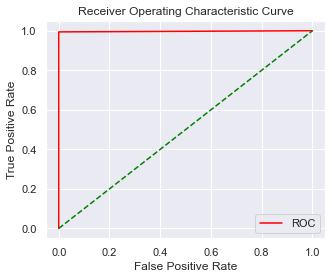

In [63]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [64]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       406
           1       1.00      0.99      1.00      1037

    accuracy                           1.00      1443
   macro avg       0.99      1.00      0.99      1443
weighted avg       1.00      1.00      1.00      1443



In [65]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.99      0.99      1.00      0.99       406
          1       1.00      0.99      1.00      1.00      1.00      0.99      1037

avg / total       1.00      1.00      1.00      1.00      1.00      0.99      1443



In [66]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

0.9958419958419958
0.9970986460348162
0.9971070395371263


In [67]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 99.58419958419958
taux d'erreur 0.4158004158004158
Sensitivity 100.0
Specitivity 99.42140790742526
Precision 98.54368932038835
Rappel 100.0
F1-score 99.26650366748166
MCC 98.98157572308554


2.Algorithme SVM

In [68]:
svc= SVC()
svc.fit(X_train, y_train_res.ravel())
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

0.9882189882189882
précision du modèle support vector machine : 0.9882


In [69]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[ 406    0]
 [  17 1020]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1020

 Faux Negatives(FN) 0

 Faux Positives(FP) 17


<AxesSubplot:>

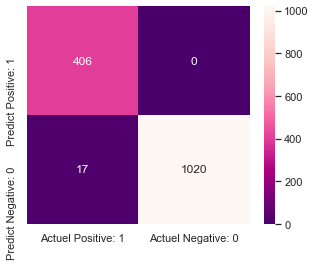

In [70]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='RdPu_r')

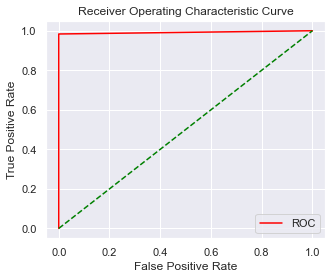

In [71]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [72]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       406
           1       1.00      0.98      0.99      1037

    accuracy                           0.99      1443
   macro avg       0.98      0.99      0.99      1443
weighted avg       0.99      0.99      0.99      1443



In [73]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      1.00      0.98      0.98      0.99      0.99       406
          1       1.00      0.98      1.00      0.99      0.99      0.98      1037

avg / total       0.99      0.99      1.00      0.99      0.99      0.98      1443



In [74]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.9882189882189882
0.9917355371900827
0.9918032786885246


In [75]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 98.82189882189883
taux d'erreur 1.178101178101178
Sensitivity 100.0
Specitivity 98.36065573770492
Precision 95.98108747044918
Rappel 100.0
F1-score 97.94933655006032
MCC 97.16358732576414


3.Regression Logistique

In [76]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_res.ravel())
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

0.9875259875259875
Précision du modèle Regression logistique: 0.9875


In [77]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[ 406    0]
 [  18 1019]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1019

 Faux Negatives(FN) 0

 Faux Positives(FP) 18


<AxesSubplot:>

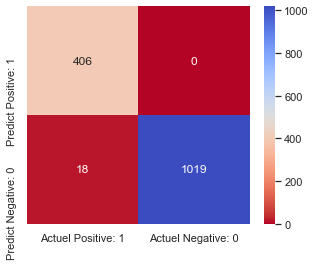

In [78]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='coolwarm_r')

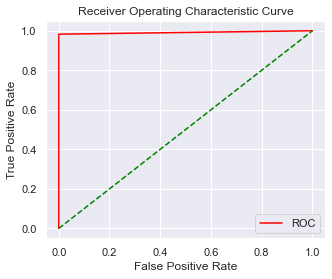

In [79]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [80]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       406
           1       1.00      0.98      0.99      1037

    accuracy                           0.99      1443
   macro avg       0.98      0.99      0.98      1443
weighted avg       0.99      0.99      0.99      1443



In [81]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      1.00      0.98      0.98      0.99      0.98       406
          1       1.00      0.98      1.00      0.99      0.99      0.98      1037

avg / total       0.99      0.99      1.00      0.99      0.99      0.98      1443



In [82]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9875259875259875
0.9912451361867703
0.9913211186113791


In [83]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 98.75259875259876
taux d'erreur 1.2474012474012475
Sensitivity 100.0
Specitivity 98.2642237222758
Precision 95.75471698113208
Rappel 100.0
F1-score 97.83132530120481
MCC 97.00135530958917


# 12.Techniques de suréchantillonage : Suréchantillonnage avec rétrécissement(shrinkage)

In [84]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [85]:
#Spliter les données en données d'entrainementet de test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.3, random_state=0)

In [86]:
y_train.value_counts()

1    2405
0     960
Name: Classe, dtype: int64

In [87]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0, shrinkage = 0.1)

X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    2405
0    2405
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

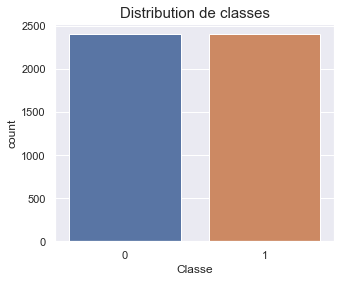

In [88]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=15)

In [89]:
#features_scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train_res)
X_test = scale.fit_transform(X_test)

X_train

array([[-0.87663622, -0.6372446 ,  0.91853645, ..., -0.3602572 ,
        -0.66106567,  1.74316465],
       [-0.90524829, -0.47262149,  0.52157902, ..., -0.3602572 ,
        -0.66106567, -0.57366927],
       [-0.20699213, -0.92799026,  0.12462159, ..., -0.3602572 ,
        -0.66106567, -0.57366927],
       ...,
       [-0.18264181,  0.28009834,  0.84711376, ..., -0.26986874,
         1.65694107, -0.57366927],
       [ 0.33671033,  0.82308132,  0.11967275, ..., -0.54103411,
         2.35133551, -0.57366927],
       [-1.17914504, -0.98591423, -0.28744139, ..., -0.26986874,
         0.27165711, -0.57366927]])

# Entrainement du modèle avec Shrinkage

 1.RandomForest ou forêt aléatoire

In [90]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_res.ravel())
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

0.28135828135828134
Precision du modèle avec 100 arbres: 0.2814


In [91]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[ 406    0]
 [1037    0]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 0

 Faux Negatives(FN) 0

 Faux Positives(FP) 1037


<AxesSubplot:>

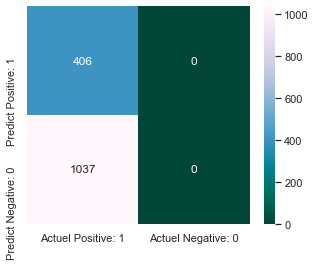

In [92]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='PuBuGn_r')

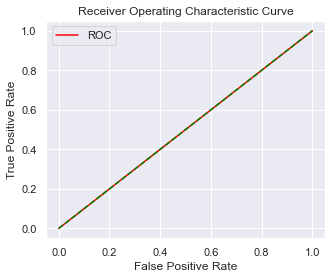

In [93]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [94]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.28      1.00      0.44       406
           1       0.00      0.00      0.00      1037

    accuracy                           0.28      1443
   macro avg       0.14      0.50      0.22      1443
weighted avg       0.08      0.28      0.12      1443



C:\Users\Josham Kadiebwe\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Josham Kadiebwe\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Josham Kadiebwe\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [95]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.28      1.00      0.00      0.44      0.00      0.00       406
          1       0.00      0.00      1.00      0.00      0.00      0.00      1037

avg / total       0.08      0.28      0.72      0.12      0.00      0.00      1443



C:\Users\Josham Kadiebwe\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

0.28135828135828134
0.0
0.5


In [97]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 28.135828135828135
taux d'erreur 71.86417186417187
Sensitivity 100.0
Specitivity 0.0
Precision 28.135828135828135
Rappel 100.0
F1-score 43.91563007030827
MCC 0.0


2.Algorithme SVM

In [98]:
svc= SVC()
svc.fit(X_train, y_train_res.ravel())
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

0.966042966042966
précision du modèle support vector machine : 0.9660


In [99]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[406   0]
 [ 49 988]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 988

 Faux Negatives(FN) 0

 Faux Positives(FP) 49


<AxesSubplot:>

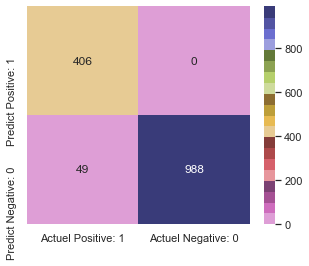

In [100]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20b_r')

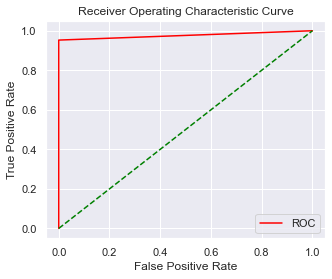

In [101]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [102]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       406
           1       1.00      0.95      0.98      1037

    accuracy                           0.97      1443
   macro avg       0.95      0.98      0.96      1443
weighted avg       0.97      0.97      0.97      1443



In [103]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      1.00      0.95      0.94      0.98      0.96       406
          1       1.00      0.95      1.00      0.98      0.98      0.95      1037

avg / total       0.97      0.97      0.99      0.97      0.98      0.95      1443



In [104]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.966042966042966
0.9758024691358025
0.976374156219865


In [105]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 96.60429660429661
taux d'erreur 3.3957033957033955
Sensitivity 100.0
Specitivity 95.274831243973
Precision 89.23076923076924
Rappel 100.0
F1-score 94.30894308943091
MCC 92.20328887968931


3. Regresssion Logistique

In [106]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_res)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

0.9598059598059598
Précision du modèle Regression logistique: 0.9598


In [107]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[406   0]
 [ 58 979]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 979

 Faux Negatives(FN) 0

 Faux Positives(FP) 58


<AxesSubplot:>

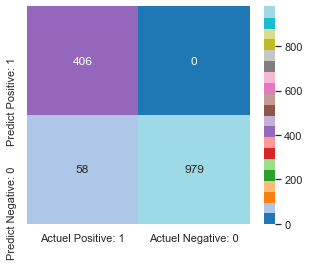

In [108]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

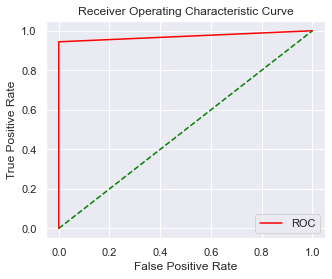

In [109]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [110]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       406
           1       1.00      0.94      0.97      1037

    accuracy                           0.96      1443
   macro avg       0.94      0.97      0.95      1443
weighted avg       0.96      0.96      0.96      1443



In [111]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      1.00      0.94      0.93      0.97      0.95       406
          1       1.00      0.94      1.00      0.97      0.97      0.94      1037

avg / total       0.96      0.96      0.98      0.96      0.97      0.94      1443



In [112]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9598059598059598
0.9712301587301588
0.9720347155255544


In [113]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 95.98059598059598
taux d'erreur 4.0194040194040195
Sensitivity 100.0
Specitivity 94.4069431051109
Precision 87.5
Rappel 100.0
F1-score 93.33333333333333
MCC 90.88788435043035


# 13.Suréchantillonage avec smote

In [114]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [115]:
#Spliter les données en données d'entrainementet de test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.3, random_state=0)

In [116]:
y_train.value_counts()

1    2405
0     960
Name: Classe, dtype: int64

In [117]:
#Application de la methode smote sur les données d'entrainement
from imblearn.over_sampling import SMOTE

smote =SMOTE(random_state=0)
X_train_res, y_train_res= smote.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    2405
0    2405
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

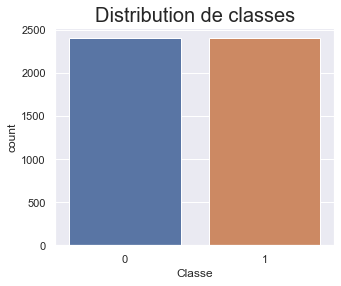

In [118]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=20)

In [119]:
#features_scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train_res)
X_test = scale.fit_transform(X_test)

X_train

array([[-0.87022391, -0.62520769,  0.90623509, ..., -0.36493293,
        -0.66259131,  1.33309274],
       [-0.89875902, -0.46135478,  0.50980513, ..., -0.36493293,
        -0.66259131, -0.75013536],
       [-0.20238085, -0.91459307,  0.11337517, ..., -0.36493293,
        -0.66259131, -0.75013536],
       ...,
       [-1.17378893, -1.09426366,  0.50980513, ..., -0.36493293,
         0.20396723,  1.33309274],
       [-1.29521494, -1.35668621,  1.69909501, ...,  2.74199832,
         0.63724651,  1.33309274],
       [-0.32380686, -0.07352552,  0.90623509, ..., -0.36493293,
         2.37036359, -0.75013536]])

# Entrainement du modèle avec smote

1.RandomForest ou forêt aléatoire

In [120]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_res.ravel())
y_pred_rfc=rfc.predict(X_test)
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

Precision du modèle avec 100 arbres: 0.9958


In [121]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[ 406    0]
 [   6 1031]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1031

 Faux Negatives(FN) 0

 Faux Positives(FP) 6


<AxesSubplot:>

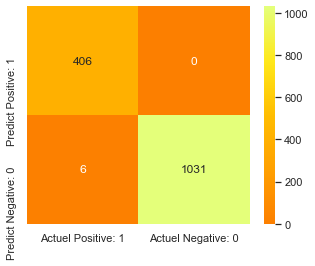

In [122]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='Wistia_r')

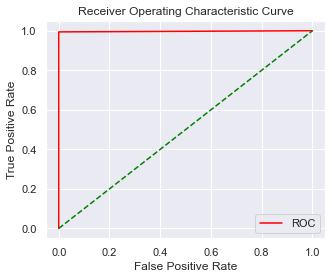

In [123]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [124]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       406
           1       1.00      0.99      1.00      1037

    accuracy                           1.00      1443
   macro avg       0.99      1.00      0.99      1443
weighted avg       1.00      1.00      1.00      1443



In [125]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.99      0.99      1.00      0.99       406
          1       1.00      0.99      1.00      1.00      1.00      0.99      1037

avg / total       1.00      1.00      1.00      1.00      1.00      0.99      1443



In [126]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

0.9958419958419958
0.9970986460348162
0.9971070395371263


In [127]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 99.58419958419958
taux d'erreur 0.4158004158004158
Sensitivity 100.0
Specitivity 99.42140790742526
Precision 98.54368932038835
Rappel 100.0
F1-score 99.26650366748166
MCC 98.98157572308554


2.Algorthme SVM

In [128]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(X_train, y_train_res)
y_pred_svm = svc.predict(X_test)

print(svc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

0.9882189882189882
précision du modèle support vector machine : 0.9882


<AxesSubplot:>

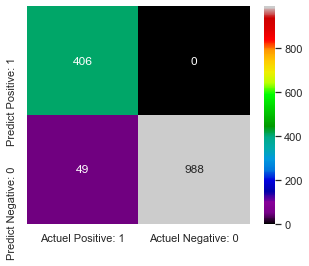

In [129]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='nipy_spectral')

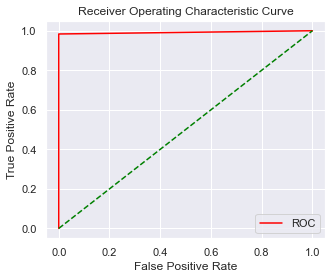

In [130]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [131]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       406
           1       1.00      0.98      0.99      1037

    accuracy                           0.99      1443
   macro avg       0.98      0.99      0.99      1443
weighted avg       0.99      0.99      0.99      1443



In [132]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      1.00      0.98      0.98      0.99      0.99       406
          1       1.00      0.98      1.00      0.99      0.99      0.98      1037

avg / total       0.99      0.99      1.00      0.99      0.99      0.98      1443



In [133]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))


0.9882189882189882
0.9917355371900827
0.9918032786885246


In [134]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 96.60429660429661
taux d'erreur 3.3957033957033955
Sensitivity 100.0
Specitivity 95.274831243973
Precision 89.23076923076924
Rappel 100.0
F1-score 94.30894308943091
MCC 97.16358732576414


3.Regression logistique

In [135]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_res)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

0.9868329868329868
Précision du modèle Regression logistique: 0.9868


In [136]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[ 406    0]
 [  19 1018]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1018

 Faux Negatives(FN) 0

 Faux Positives(FP) 19


<AxesSubplot:>

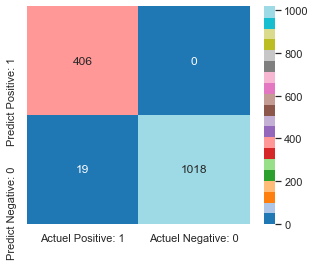

In [137]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

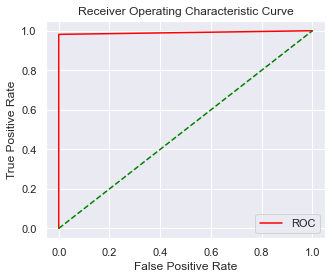

In [138]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [139]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       406
           1       1.00      0.98      0.99      1037

    accuracy                           0.99      1443
   macro avg       0.98      0.99      0.98      1443
weighted avg       0.99      0.99      0.99      1443



In [140]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      1.00      0.98      0.98      0.99      0.98       406
          1       1.00      0.98      1.00      0.99      0.99      0.98      1037

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      1443



In [141]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9868329868329868
0.9907542579075426
0.9908389585342334


In [142]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 98.68329868329869
taux d'erreur 1.3167013167013166
Sensitivity 100.0
Specitivity 98.16779170684667
Precision 95.52941176470588
Rappel 100.0
F1-score 97.71359807460891
MCC 96.83961687241042


# 21.Techniques de souséchantillonage : Randomundersampling

In [143]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [144]:
#Spliter les données en données d'entrainementet de test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.3, random_state=0)

In [145]:
y_train.value_counts()

1    2405
0     960
Name: Classe, dtype: int64

In [146]:
from imblearn.under_sampling import RandomUnderSampler
ran = RandomUnderSampler()

X_train_res, y_train_res = ran.fit_resample(X_train, y_train)
y_train_res.value_counts()

1    960
0    960
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Distribution de classes')

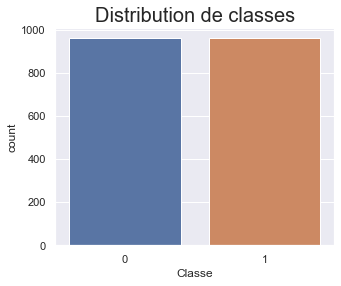

In [147]:
sns.countplot(x=y_train_res).set_title('Distribution de classes', size=20)

In [148]:
#features_scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train_res)
X_test = sc.fit_transform(X_test)
X_train

array([[-0.87620473, -0.63077387,  0.89181815, ..., -0.35881443,
        -0.6608206 ,  1.33968647],
       [-1.72968245, -1.36151329,  1.27634337, ..., -0.35881443,
         0.84981917,  1.33968647],
       [-0.14465241, -1.1637838 ,  0.12276769, ..., -0.35881443,
         0.63401349,  1.33968647],
       ...,
       [ 1.74275259,  2.40526652, -0.26175754, ..., -0.35881443,
        -0.6608206 , -0.74644331],
       [ 0.28208645, -0.23796011,  0.50729292, ..., -0.35881443,
        -0.6608206 , -0.74644331],
       [ 1.8085923 ,  2.47668721, -1.79985845, ..., -0.35881443,
        -0.6608206 , -0.74644331]])

# Entrainement du modèles

1. RandomForest

In [149]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train_res.ravel())

y_pred_rfc100 = rfc.predict(X_test)

print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc100)))

Precision du modèle avec 100 arbres: 0.9958


In [150]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc100)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[ 406    0]
 [   6 1031]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1031

 Faux Negatives(FN) 0

 Faux Positives(FP) 6


<AxesSubplot:>

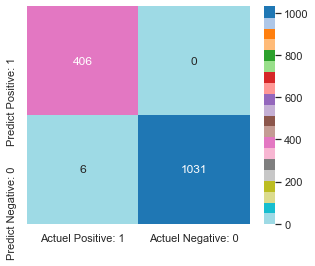

In [151]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20_r')

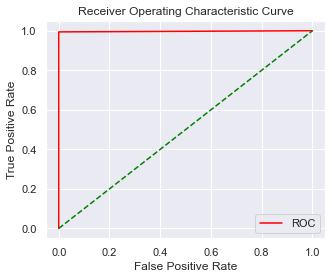

In [152]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc100)
plot_roc_curve(fper, tper)

In [153]:
print(classification_report(y_test, y_pred_rfc100))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       406
           1       1.00      0.99      1.00      1037

    accuracy                           1.00      1443
   macro avg       0.99      1.00      0.99      1443
weighted avg       1.00      1.00      1.00      1443



In [154]:
print(classification_report_imbalanced(y_test, y_pred_rfc100))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.99      0.99      1.00      0.99       406
          1       1.00      0.99      1.00      1.00      1.00      0.99      1037

avg / total       1.00      1.00      1.00      1.00      1.00      0.99      1443



In [155]:
print(accuracy_score(y_test, y_pred_rfc100))
print(f1_score(y_test, y_pred_rfc100))
print(roc_auc_score(y_test, y_pred_rfc100))

0.9958419958419958
0.9970986460348162
0.9971070395371263


In [156]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc100)*100)

Accuracy 99.58419958419958
taux d'erreur 0.4158004158004158
Sensitivity 100.0
Specitivity 99.42140790742526
Precision 98.54368932038835
Rappel 100.0
F1-score 99.26650366748166
MCC 98.98157572308554


2. Algorithme SVM

In [157]:
svc= SVC()
svc.fit(X_train, y_train_res.ravel())
y_pred_svm= svc.predict(X_test)
print('précision du modèle : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

précision du modèle : 0.9903


In [158]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[ 406    0]
 [  14 1023]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1023

 Faux Negatives(FN) 0

 Faux Positives(FP) 14


<AxesSubplot:>

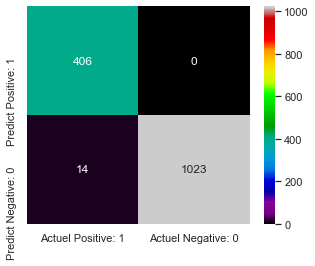

In [159]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='nipy_spectral')

In [160]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       406
           1       1.00      0.99      0.99      1037

    accuracy                           0.99      1443
   macro avg       0.98      0.99      0.99      1443
weighted avg       0.99      0.99      0.99      1443



In [161]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      1.00      0.99      0.98      0.99      0.99       406
          1       1.00      0.99      1.00      0.99      0.99      0.99      1037

avg / total       0.99      0.99      1.00      0.99      0.99      0.99      1443



In [162]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 99.02979902979902
taux d'erreur 0.9702009702009702
Sensitivity 100.0
Specitivity 98.64995178399228
Precision 96.66666666666667
Rappel 100.0
F1-score 98.3050847457627
MCC 97.65327442429117


3.regression logistique

In [163]:
#Regression logistique 
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train_res)
y_pred_log = log.predict(X_test)
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test, y_pred_log)))

Précision du modèle Regression logistique: 0.9861


In [164]:
cm_log = confusion_matrix(y_test, y_pred_log)
print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n FauxPositives(FP) ', cm_log[1,0])

Matrice de confusion

 [[ 406    0]
 [  20 1017]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1017

 Faux Negatives(FN) 0

 FauxPositives(FP)  20


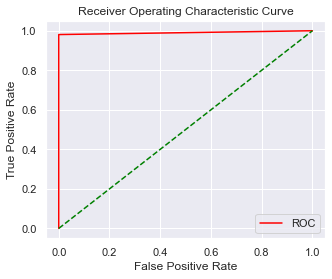

In [165]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper) 

In [166]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       406
           1       1.00      0.98      0.99      1037

    accuracy                           0.99      1443
   macro avg       0.98      0.99      0.98      1443
weighted avg       0.99      0.99      0.99      1443



In [167]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      1.00      0.98      0.98      0.99      0.98       406
          1       1.00      0.98      1.00      0.99      0.99      0.98      1037

avg / total       0.99      0.99      0.99      0.99      0.99      0.98      1443



In [168]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9861399861399861
0.9902629016553066
0.9903567984570878


In [169]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 98.6139986139986
taux d'erreur 1.386001386001386
Sensitivity 100.0
Specitivity 98.07135969141754
Precision 95.30516431924883
Rappel 100.0
F1-score 97.59615384615384
MCC 96.67836909258816


# 22 Sous-échantillonnage à l'aide de K-Means

In [170]:
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [171]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.3, random_state=0)
X_train.shape

(3365, 12)

In [172]:
from imblearn.under_sampling import ClusterCentroids
clus = ClusterCentroids(random_state=0)

X_train_clus, y_train_clus=clus.fit_resample(X_train, y_train)
y_train_clus.value_counts()

1    960
0    960
Name: Classe, dtype: int64

In [173]:
#features_scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train_clus)
X_test = sc.fit_transform(X_test)

# Entrainement du modèles

1.RandomForest ou forêt aléatoire

In [174]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_clus.ravel())
y_pred_rfc=rfc.predict(X_test)
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

Precision du modèle avec 100 arbres: 0.9958


In [175]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[ 406    0]
 [   6 1031]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1031

 Faux Negatives(FN) 0

 Faux Positives(FP) 6


<AxesSubplot:>

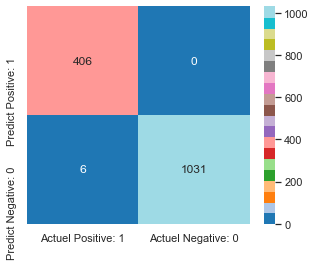

In [176]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

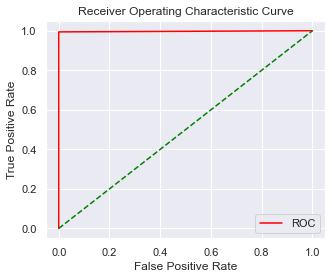

In [177]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [178]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       406
           1       1.00      0.99      1.00      1037

    accuracy                           1.00      1443
   macro avg       0.99      1.00      0.99      1443
weighted avg       1.00      1.00      1.00      1443



In [179]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.99      0.99      1.00      0.99       406
          1       1.00      0.99      1.00      1.00      1.00      0.99      1037

avg / total       1.00      1.00      1.00      1.00      1.00      0.99      1443



In [180]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

0.9958419958419958
0.9970986460348162
0.9971070395371263


In [181]:
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 99.58419958419958
taux d'erreur 0.4158004158004158
Sensitivity 100.0
Specitivity 99.42140790742526
Precision 98.54368932038835
Rappel 100.0
F1-score 99.26650366748166
MCC 98.98157572308554


2.Algorithme SVM

In [182]:
svc= SVC()
svc.fit(X_train, y_train_clus.ravel())
y_pred_svm= svc.predict(X_test)
print('précision du modèle : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

précision du modèle : 0.9965


In [183]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[ 402    4]
 [   1 1036]]

 Vrais Positives(VP) 402

 vrais Negatives(VN) 1036

 Faux Negatives(FN) 4

 Faux Positives(FP) 1


<AxesSubplot:>

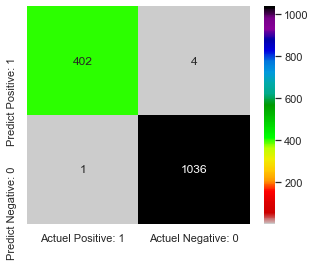

In [184]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='nipy_spectral_r')

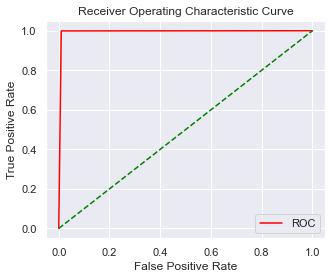

In [185]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [186]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       406
           1       1.00      1.00      1.00      1037

    accuracy                           1.00      1443
   macro avg       1.00      0.99      1.00      1443
weighted avg       1.00      1.00      1.00      1443



In [187]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      0.99      0.99      0.99       406
          1       1.00      1.00      0.99      1.00      0.99      0.99      1037

avg / total       1.00      1.00      0.99      1.00      0.99      0.99      1443



In [188]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.9965349965349966
0.9975926817525276
0.9945917315484701


In [189]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 99.65349965349965
taux d'erreur 0.3465003465003465
Sensitivity 99.01477832512316
Specitivity 99.90356798457087
Precision 99.75186104218362
Rappel 99.01477832512316
F1-score 99.38195302843016
MCC 99.14254191715973


3. Regression Logistique

In [190]:
#Regression logistique 
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train_res)
y_pred_log = log.predict(X_test)
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test, y_pred_log)))

Précision du modèle Regression logistique: 0.9875


In [191]:
cm_log = confusion_matrix(y_test, y_pred_log)
print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[ 406    0]
 [  18 1019]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1019

 Faux Negatives(FN) 0

 Faux Positives(FP) 18


<AxesSubplot:>

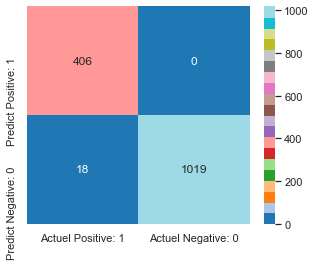

In [192]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='tab20')

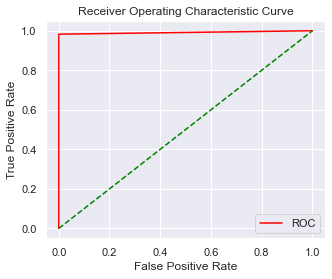

In [193]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [194]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       406
           1       1.00      0.98      0.99      1037

    accuracy                           0.99      1443
   macro avg       0.98      0.99      0.98      1443
weighted avg       0.99      0.99      0.99      1443



In [195]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      1.00      0.98      0.98      0.99      0.98       406
          1       1.00      0.98      1.00      0.99      0.99      0.98      1037

avg / total       0.99      0.99      1.00      0.99      0.99      0.98      1443



In [196]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9875259875259875
0.9912451361867703
0.9913211186113791


In [197]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = 2*(precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 98.75259875259876
taux d'erreur 1.2474012474012475
Sensitivity 100.0
Specitivity 98.2642237222758
Precision 95.75471698113208
Rappel 100.0
F1-score 97.83132530120481
MCC 97.00135530958917


# 23.Souséchantillonage avec NearMiss

In [198]:
#Spliter les données pour avoir la matrices X et y
X=data.drop(['Classe'], axis=1)
y=data['Classe']

In [199]:
#Spliter les données en données d'entrainementet de test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size =0.3, random_state=0)

In [200]:
y_train.value_counts()

1    2405
0     960
Name: Classe, dtype: int64

In [201]:
from imblearn.under_sampling import NearMiss

nearmiss = NearMiss()

X_train_miss, y_train_miss= nearmiss.fit_resample(X_train, y_train)

y_train_miss.value_counts()

1    960
0    960
Name: Classe, dtype: int64

Text(0.5, 1.0, 'Equilibrages des classes')

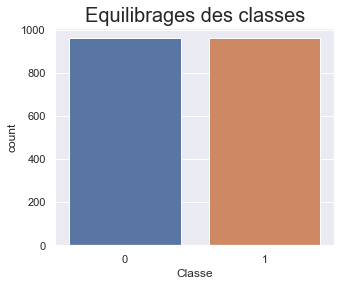

In [202]:
sns.countplot(x=y_train_miss).set_title('Equilibrages des classes', size=20)

In [203]:
#features_scaling

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train_miss)
X_test = scale.fit_transform(X_test)

X_train

array([[-0.77550155, -0.47120772,  0.88732873, ..., -0.35881443,
        -0.66717722,  1.33816952],
       [-1.75871637, -1.38334664,  1.25128326, ..., -0.35881443,
         0.84055524,  1.33816952],
       [ 0.06725402, -1.13653258,  0.15941967, ..., -0.35881443,
         0.62516489,  1.33816952],
       ...,
       [ 2.31741137,  3.40765273, -1.66035299, ..., -0.35881443,
        -0.66717722, -0.74728947],
       [ 0.27794291,  0.01581668, -0.93244393, ..., -0.35881443,
        -0.66717722, -0.74728947],
       [-0.14343488,  0.51522306, -0.93244393, ..., -0.35881443,
        -0.66717722, -0.74728947]])

# Entrainement du modèle avec NearMiss

1.RandomForest ou forêt aléatoire

In [204]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train_miss)
y_pred_rfc=rfc.predict(X_test)
print(rfc.score(X_test, y_test))
print('Precision du modèle avec 100 arbres: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rfc)))

0.9958419958419958
Precision du modèle avec 100 arbres: 0.9958


In [205]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print('Matrice de confusion\n\n', cm_rfc)
print('\n Vrais Positives(VP)', cm_rfc[0,0])
print('\n vrais Negatives(VN)', cm_rfc[1,1])
print('\n Faux Negatives(FN)', cm_rfc[0,1])
print('\n Faux Positives(FP)', cm_rfc[1,0])

Matrice de confusion

 [[ 406    0]
 [   6 1031]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1031

 Faux Negatives(FN) 0

 Faux Positives(FP) 6


<AxesSubplot:>

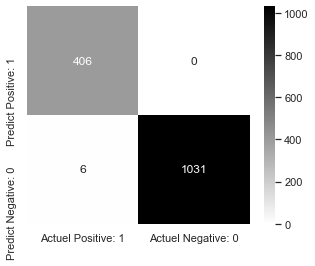

In [206]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_rfc, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='gist_yarg')

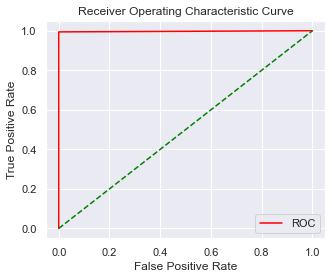

In [207]:
fper, tper, thresholds = roc_curve(y_test, y_pred_rfc)
plot_roc_curve(fper, tper)

In [208]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       406
           1       1.00      0.99      1.00      1037

    accuracy                           1.00      1443
   macro avg       0.99      1.00      0.99      1443
weighted avg       1.00      1.00      1.00      1443



In [209]:
print(classification_report_imbalanced(y_test, y_pred_rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.99      0.99      1.00      0.99       406
          1       1.00      0.99      1.00      1.00      1.00      0.99      1037

avg / total       1.00      1.00      1.00      1.00      1.00      0.99      1443



In [210]:
print(accuracy_score(y_test, y_pred_rfc))
print(f1_score(y_test, y_pred_rfc))
print(roc_auc_score(y_test, y_pred_rfc))

0.9958419958419958
0.9970986460348162
0.9971070395371263


In [211]:
from sklearn.metrics import matthews_corrcoef
tp = cm_rfc[0,0]
tn = cm_rfc[1,1]
fn = cm_rfc[0,1]
fp = cm_rfc[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_rfc)*100)

Accuracy 99.58419958419958
taux d'erreur 0.4158004158004158
Sensitivity 100.0
Specitivity 99.42140790742526
Precision 98.54368932038835
Rappel 100.0
F1-score 99.26650366748166
MCC 98.98157572308554


2.Algorthme SVM

In [212]:
svc= SVC()
svc.fit(X_train, y_train_miss)
y_pred_svm = svc.predict(X_test)

print(rfc.score(X_test, y_test))
print('précision du modèle support vector machine : {0:0.4f}' .format(accuracy_score(y_test, y_pred_svm)))

0.9958419958419958
précision du modèle support vector machine : 0.9861


In [213]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

print('Matrice de confusion\n\n', cm_svm)
print('\n Vrais Positives(VP)', cm_svm[0,0])
print('\n vrais Negatives(VN)', cm_svm[1,1])
print('\n Faux Negatives(FN)', cm_svm[0,1])
print('\n Faux Positives(FP)', cm_svm[1,0])

Matrice de confusion

 [[ 402    4]
 [  16 1021]]

 Vrais Positives(VP) 402

 vrais Negatives(VN) 1021

 Faux Negatives(FN) 4

 Faux Positives(FP) 16


<AxesSubplot:>

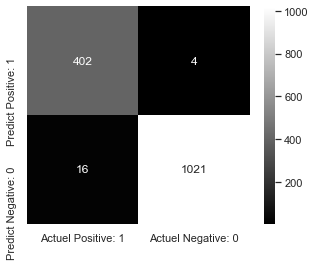

In [214]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_svm, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='gray')

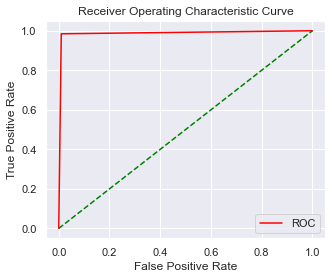

In [215]:
fper, tper, thresholds = roc_curve(y_test, y_pred_svm)
plot_roc_curve(fper, tper)

In [216]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       406
           1       1.00      0.98      0.99      1037

    accuracy                           0.99      1443
   macro avg       0.98      0.99      0.98      1443
weighted avg       0.99      0.99      0.99      1443



In [217]:
print(classification_report_imbalanced(y_test, y_pred_svm))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.99      0.98      0.98      0.99      0.98       406
          1       1.00      0.98      0.99      0.99      0.99      0.97      1037

avg / total       0.99      0.99      0.99      0.99      0.99      0.97      1443



In [218]:
print(accuracy_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))
print(roc_auc_score(y_test, y_pred_svm))

0.9861399861399861
0.9903006789524734
0.987359330391286


In [219]:
tp = cm_svm[0,0]
tn = cm_svm[1,1]
fn = cm_svm[0,1]
fp = cm_svm[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec/(precision+rec))
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_svm)*100)

Accuracy 98.6139986139986
taux d'erreur 1.386001386001386
Sensitivity 99.01477832512316
Specitivity 98.45708775313405
Precision 96.17224880382776
Rappel 99.01477832512316
F1-score 97.57281553398059
MCC 96.62324127483582


3.Regression logistique

In [220]:
#Regression logistique
log = LogisticRegression()
log.fit(X_train, y_train_miss)
y_pred_log =log.predict(X_test)
print(log.score(X_test, y_test))
print('Précision du modèle Regression logistique: {0:0.4f}' .format(accuracy_score(y_test.ravel(), y_pred_log)))

0.9785169785169785
Précision du modèle Regression logistique: 0.9785


In [221]:
cm_log= confusion_matrix(y_test, y_pred_log)

print('Matrice de confusion\n\n', cm_log)
print('\n Vrais Positives(VP)', cm_log[0,0])
print('\n vrais Negatives(VN)', cm_log[1,1])
print('\n Faux  Negatives(FN)', cm_log[0,1])
print('\n Faux Positives(FP)', cm_log[1,0])

Matrice de confusion

 [[ 406    0]
 [  31 1006]]

 Vrais Positives(VP) 406

 vrais Negatives(VN) 1006

 Faux  Negatives(FN) 0

 Faux Positives(FP) 31


<AxesSubplot:>

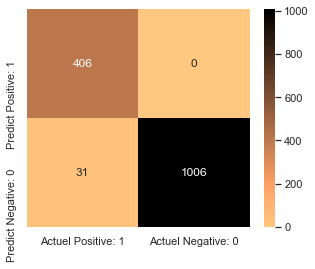

In [222]:
sns.set(rc={'figure.figsize':(5,4)})
cm_matrix = pd.DataFrame(data=cm_log, columns= ['Actuel Positive: 1', 'Actuel Negative: 0'], index=['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt = 'd',cmap='copper_r')

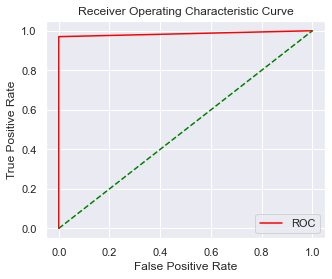

In [223]:
fper, tper, thresholds = roc_curve(y_test, y_pred_log)
plot_roc_curve(fper, tper)

In [224]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       406
           1       1.00      0.97      0.98      1037

    accuracy                           0.98      1443
   macro avg       0.96      0.99      0.97      1443
weighted avg       0.98      0.98      0.98      1443



In [225]:
print(classification_report_imbalanced(y_test, y_pred_log))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      1.00      0.97      0.96      0.98      0.97       406
          1       1.00      0.97      1.00      0.98      0.98      0.97      1037

avg / total       0.98      0.98      0.99      0.98      0.98      0.97      1443



In [226]:
print(accuracy_score(y_test, y_pred_log))
print(f1_score(y_test, y_pred_log))
print(roc_auc_score(y_test, y_pred_log))

0.9785169785169785
0.9848262359275575
0.9850530376084861


In [227]:
tp = cm_log[0,0]
tn = cm_log[1,1]
fn = cm_log[0,1]
fp = cm_log[1,0]

acc = ((tp+tn)/(tp+fp+tn+fn))
print("Accuracy", acc*100)

ErRate =((fp+fn)/(tp+fp+tn+fn))
print("taux d'erreur", ErRate*100)

Sn = (tp/(tp+fn))
print("Sensitivity", Sn*100)

Sp = (tn/(tn+fp))
print("Specitivity", Sp*100)

precision = (tp/(tp+fp))
print("Precision", precision*100)

rec = (tp/(tp+fn))
print("Rappel", rec*100)

F_score = (2*precision*rec)/(precision+rec)
print("F1-score", F_score*100)

print("MCC", matthews_corrcoef(y_test,y_pred_log)*100)

Accuracy 97.85169785169785
taux d'erreur 2.148302148302148
Sensitivity 100.0
Specitivity 97.0106075216972
Precision 92.90617848970251
Rappel 100.0
F1-score 96.3226571767497
MCC 94.93621446953358


In [228]:
import pickle

file_name1 = 'C://Users//Josham Kadiebwe//Desktop//Amazon_rfc.sav'
file_name2 = 'C://Users//Josham Kadiebwe//Desktop//Amazon_svm.sav'
file_name3 = 'C://Users//Josham Kadiebwe//Desktop//Amazon_reglog.sav'

pickle.dump(rfc, open(file_name1, 'wb'))
pickle.dump(svc, open(file_name2, 'wb'))
pickle.dump(log, open(file_name3, 'wb'))
